In [1]:
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

### Import Data

In [2]:
house_df = pd.read_csv("00_Challenges_Data/house-votes-84.data.txt",header=None)

In [3]:
house_df = house_df.rename({0:"party"},axis=1)
house_df.head()

,party,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [5]:
house_df.describe()

,party,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [30]:
house_df = house_df.replace({'y':1,'n':0,'?':np.nan})
house_df = house_df.replace({'democrat':1,'republican':0,'?':np.nan})

In [31]:
col_mean = [0] + house_df.describe().loc["mean"]        #create a list of the column means

for col in house_df.columns[1:]:                        #loop through each column and replace NA with the mean
    house_df[col] = house_df[col].fillna(col_mean[col])

### Challenge 1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set)

In [41]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [33]:
def accuracy(actuals, preds):
    return np.mean(actuals == preds)

def precision(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fp = np.sum((actuals == 0) & (preds == 1))
    return tp / (tp + fp)

def recall(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fn = np.sum((actuals == 1) & (preds == 0))
    return tp / (tp + fn)

def F1(actuals, preds):
    p, r = precision(actuals, preds), recall(actuals, preds)
    return 2*p*r / (p + r)

In [34]:
X = house_df.iloc[:,1:]   #set X equal to the features/voting records
y = house_df.loc[:,"party"]    #set y target to the party classification

In [35]:
#hold out 30% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4444) 

#### Models

In [40]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN")
print("accuracy: ",accuracy_score(y_test, y_pred))
print("precision: ",precision(actuals = y_test, preds = y_pred))
print("recall: ",recall(actuals = y_test, preds = y_pred))
print("f1: ",F1(actuals = y_test, preds = y_pred))

KNN
accuracy:  0.916030534351145
precision:  0.9342105263157895
recall:  0.922077922077922
f1:  0.9281045751633986


In [42]:
lgmodel = LogisticRegression(C=1000)
lgmodel.fit(X_train,y_train)
y_pred = lgmodel.predict(X_test)
print("Logistic")
print("accuracy: ",accuracy_score(y_test, y_pred))
print("precision: ",precision(actuals = y_test, preds = y_pred))
print("recall: ",recall(actuals = y_test, preds = y_pred))
print("f1: ",F1(actuals = y_test, preds = y_pred))

Logistic
accuracy:  0.9312977099236641
precision:  0.925
recall:  0.961038961038961
f1:  0.9426751592356688


### Challenge 2
For each, draw the ROC curve and calculate the AUC.

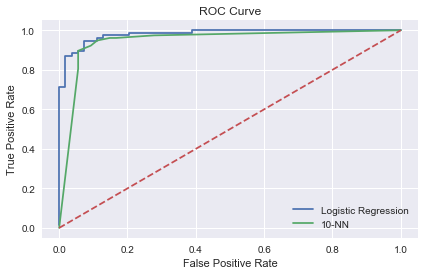

In [48]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, lgmodel.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Logistic Regression','10-NN'])

### Challenge 3
Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

In [49]:
from sklearn.cross_validation import cross_val_score

In [56]:
# KNN
knn = KNeighborsClassifier(n_neighbors=8)
knn_cv = cross_val_score(knn,X_train,y_train,cv=5,scoring='accuracy')
print("accuracy: ",knn_cv.mean())
knn_cv = cross_val_score(knn,X_train,y_train,cv=5,scoring='precision')
print("precision: ",knn_cv.mean())
knn_cv = cross_val_score(knn,X_train,y_train,cv=5,scoring='recall')
print("recall: ",knn_cv.mean())
knn_cv = cross_val_score(knn,X_train,y_train,cv=5,scoring='f1')
print("F1: ",knn_cv.mean())

accuracy:  0.9375956284153005
precision:  0.9888888888888889
recall:  0.9105263157894736
F1:  0.9472777124951037


In [57]:
# Logistic
lgmodel = LogisticRegression(C=1000)
lgmodel_cv = cross_val_score(lgmodel,X_train,y_train,cv=5,scoring='accuracy')
print("accuracy: ", lgmodel_cv.mean())
lgmodel_cv = cross_val_score(lgmodel,X_train,y_train,cv=5,scoring='precision')
print("precision: ", lgmodel_cv.mean())
lgmodel_cv = cross_val_score(lgmodel,X_train,y_train,cv=5,scoring='recall')
print("recall: ", lgmodel_cv.mean())
lgmodel_cv = cross_val_score(lgmodel,X_train,y_train,cv=5,scoring='f1')
print("F1: ", lgmodel_cv.mean())

accuracy:  0.944207650273224
precision:  0.9683991683991684
recall:  0.9421052631578947
F1:  0.9547938089307951


### Challenge 4
For your movie classifiers, calculate the precision and recall for each class.

In [74]:
movie_df = pd.read_csv('/Users/dhui/Dropbox/Metis/01_Github/nyc18_ds17/challenges/challenges_data/2013_movies.csv')

In [75]:
#replace missing budget numbers with median values 
median_movie_budget = movie_df.describe()["Budget"]["50%"]
movie_df["Budget"] = movie_df["Budget"].fillna(median_movie_budget)

In [76]:
movie_df = movie_df.replace({'R':3,'PG-13':2,'PG':1,"G":0})

In [77]:
y = movie_df["Rating"]

In [78]:
X = movie_df[["Budget","DomesticTotalGross","Runtime"]]

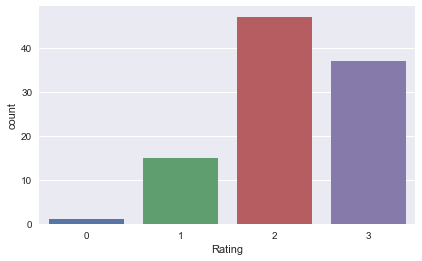

In [79]:
import seaborn as sns
sns.countplot(y);

In [80]:
#hold out 25% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=4444) 

#### KNN Model

In [81]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("accuracy: ",round(accuracy_score(y_test, y_pred),3))
print("precision: ",precision(actuals = y_test, preds = y_pred))
print("recall: ",recall(actuals = y_test, preds = y_pred))
print("f1: ",F1(actuals = y_test, preds = y_pred))

accuracy:  0.64
precision:  1.0
recall:  1.0
f1:  1.0


#### Logistic Model

In [85]:
lgmodel = LogisticRegression(C=100000)
lgmodel.fit(X_train,y_train)
y_pred = lgmodel.predict(X_test)
print("accuracy: ",round(accuracy_score(y_test, y_pred),3))
print("precision: ",precision(actuals = y_test, preds = y_pred))
print("recall: ",recall(actuals = y_test, preds = y_pred))
print("f1: ",F1(actuals = y_test, preds = y_pred))

accuracy:  0.52
precision:  nan
recall:  nan
f1:  nan


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


### Challenge 5

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [101]:
health_df = pd.read_csv("00_Challenges_Data/haberman.data.txt",header=None)

In [102]:
health_df = health_df.rename({0:'age',1:'surgery_year',2:'nodes',3:'status'},axis=1)

In [103]:
health_df["status"] = health_df["status"].apply(lambda x: x-1)

In [104]:
health_df.describe()

,age,surgery_year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,0.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


#### Use logistic regression to predict survival after 5 years. How well does your model do?

In [105]:
X = health_df[["age","surgery_year","nodes"]]
y = health_df["status"]

In [106]:
#hold out 25% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=4444) 

In [107]:
lgmodel = LogisticRegression(C=100000)
lgmodel.fit(X_train,y_train)
y_pred_logistic = lgmodel.predict(X_test)
logistic_score = round(accuracy_score(y_test, y_pred_logistic),5)
print(logistic_score)

0.84416


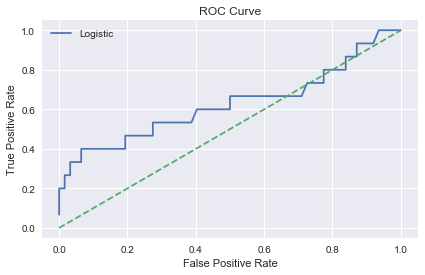

In [110]:
fpr, tpr, _ = roc_curve(y_test, lgmodel.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Logistic'])